# Data Analysis for Patient Reported Outcome related articles

In [1]:
# import packages

import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# define absolute path and data path

PATH = "/content/drive/MyDrive/GitHub/PatientReportedOutcome/"
data_path = PATH + "Data/"

##1. Count number of articles available for all categories: PRO and noPRO
For the text classification task, articles published in languages other than English has been discarded for now.

In [3]:
n_articles_dict = {
    "PRO" : {
        "2013-14" : 0,
        "2015" : 0,
        "2016" : 0
    },
    "noPRO" : {
        "2013-14" : 0,
        "2015" : 0,
        "2016" : 0
    },
    "noTITOL" : 0
}

In [4]:
# define paths for the categories
pro_data_path = data_path + "PRO/txt/en/"
nopro_data_path = data_path + "noPRO/txt/en/"
notitol_data_path = data_path + "noTITOL/txt/en/"

# define list with previously defined paths
class_paths = [pro_data_path, nopro_data_path, notitol_data_path]

for path in class_paths:
  if path != notitol_data_path:
  # just consider full texts in this first analysis
    for year in [y for y in os.listdir(path) if y!="summaries"]:
      n_articles_dict[path.split("/")[-4]][str(year)] = len(os.listdir(path + year))
  else:
      n_articles_dict[path.split("/")[-4]] = len(os.listdir(path))

print(n_articles_dict)
print(f"\nTotal number of articles for PRO class: {sum(n_articles_dict['PRO'].values())}")
print(f"Total number of articles for noPRO class: {sum(n_articles_dict['noPRO'].values()) + n_articles_dict['noTITOL']}")

{'PRO': {'2013-14': 672, '2015': 336, '2016': 339}, 'noPRO': {'2013-14': 144, '2015': 284, '2016': 299}, 'noTITOL': 1068}

Total number of articles for PRO class: 1347
Total number of articles for noPRO class: 1795


In the following cell, I will check the number of instruments for each category that were found in the original excel file, and then, compare those values to the amount of articles I obtained.

In [5]:
# load datasets
bd_2013_14 = pd.read_excel(data_path + "bd_2013_2014.xlsx")
bd_2015 = pd.read_excel(data_path + "bd_2015.xlsx")
bd_2016 = pd.read_excel(data_path + "bd_2016.xlsx")

This is an example of how the excel files look like. All the columns that are after *filtro_instrumento* belong to the names of the instruments or questionnaires that are present in the article. Some of them were already stored in BiblioPRO, while others were new questionnaires that were collected for the first time.

In [11]:
display(bd_2013_14.head())
print(f"Number of columns: {len(bd_2013_14.columns)}")

,pmid,refid,filtro_titol,filtro_instrumento,Instrumentos_BiblioPRO_1,BiblioPRO_SIGLAS_1,Instrumentos_BiblioPRO_2,BiblioPRO_SIGLAS_2,Instrumentos_BiblioPRO_3,BiblioPRO_SIGLAS_3,...,NUEVO_SIGLAS_1,Instrumento_NUEVO_ESP_2,Instrumento_NUEVO_ENG_2,NUEVO_SIGLAS_2,Instrumento_NUEVO_ESP_3,Instrumento_NUEVO_ENG_3,NUEVO_SIGLAS_3,Instrumento_NUEVO_ESP_4,Instrumento_NUEVO_ENG_4,NUEVO_SIGLAS_4
0,PM:21245050,2427,1,1,Depression in the Medically Ill questionnaire ...,DMI-18,Depression in the Medically Ill questionnaire ...,DMI-10,Beck Depression Inventory-II,BDI-II,...,BDI-PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PM:21435750,2426,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PM:21467092,2425,1,1,Cognitive Emotion Regulation Questionnaire,CERQ,Inventario de Depresión de Beck,BDI,Versión española del State-Trait Anxiety Inven...,STAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PM:21477827,2424,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PM:21529862,2423,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of columns: 32


The following plot shows the comparison between the total amount of articles obtained each year, the number of articles that were selected after the title/abstract analysis (filtro_titol -> *f_titol = 1*) and the articles that included a PRO instrument within (filtro_instrumento -> *f_instrumento = 1*)

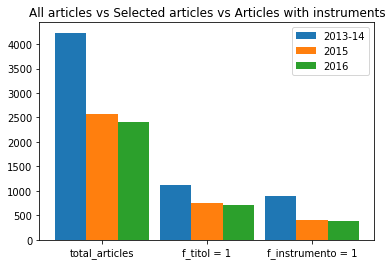

In [6]:
x = np.arange(3)
w = 0.3

plt.bar(x - 0.3, [len(bd_2013_14), sum(bd_2013_14["filtro_titol"]), sum(bd_2013_14["filtro_instrumento"])], w)
plt.bar(x, [len(bd_2015), sum(bd_2015["filtro_titol"]), sum(bd_2015["filtro_instrumento"])], w)
plt.bar(x + 0.3, [len(bd_2016), sum(bd_2016["filtro_titol"]), sum(bd_2016["filtro_instrumento"])], w)
plt.title("All articles vs Selected articles vs Articles with instruments")
plt.legend(["2013-14", "2015", "2016"])
plt.xticks(x, ["total_articles", "f_titol = 1", "f_instrumento = 1"])

plt.show()

This plot shows the real distribution of the articles analyzed, and reflects the amount of articles that actually contain a PRO instrument among all the articles that are analyzed. This is an important point to consider for further experiments, since it will be important to maintain the same percentage of articles with PRO questionnaires in the test set, and thus, get results that are closer to reality.

---

Related to this, I will compute the exact percentage of articles with a PROM (*filtro_instrumento = 1*) for further operations.

In [7]:
# computhe the percentage of articles with PROM
n_articles = len(bd_2013_14) + len(bd_2015) + len(bd_2016)
pro_articles = len(bd_2013_14[bd_2013_14["filtro_instrumento"] == 1]) + len(bd_2015[bd_2015["filtro_instrumento"] == 1]) + len(bd_2016[bd_2016["filtro_instrumento"] == 1])

print(f"Percentage of PRO articles among total amount of articles: %{round(pro_articles/n_articles, 4) * 100}")

Percentage of PRO articles among total amount of articles: %18.33


It can also be interesting to compute the percentage of articles that contain a PROM among the articles that are selected after the title/abstract selection (*filtro_titol = 1*).

In [8]:
titol_articles = len(bd_2013_14[bd_2013_14["filtro_titol"] == 1]) + len(bd_2015[bd_2015["filtro_titol"] == 1]) + len(bd_2016[bd_2016["filtro_titol"] == 1])
print(f"Percentage of PRO articles among selected articles after title/abstract revision: %{round(pro_articles/titol_articles, 4) * 100}")

Percentage of PRO articles among selected articles after title/abstract revision: %65.22


##Analyzing texts obtained from the articles

As a first approach to perform document classification and create a model that is able to separate articles with PROMs from those that do not contain any PROMs, summarized texts will be used. Thus, all the articles have been summarized to 25 sentences using Page-Rank algorithm with Jaccard simmilarity.

---

In the following cells, I will read all the summarized texts and analyze the number of sentences and the most frequent words for all of them.

In [25]:
# define dictionaries to store article summaries
pro_art_dict = {}
no_pro_art_dict = {}
no_titol_art_dict = {}

for path in class_paths:
  if path != notitol_data_path:
    for year in os.listdir(path + "summaries/"):
      filepaths = glob.glob(path + f"summaries/{year}/*.txt")
      for filepath in filepaths:
        filename = filepath.split("/")[-1]
        with open(filepath, 'r') as f:
          text = f.read()
        if path == pro_data_path:
          pro_art_dict[filename] = text
        else:
          no_pro_art_dict[filename] = text
  else:
    filepaths = glob.glob(path + "summaries/*.txt")
    for filepath in filepaths:
        filename = filepath.split("/")[-1]
        with open(filepath, 'r') as f:
          text = f.read()
        no_titol_art_dict[filename] = text

print(f"pro_dict size: {len(pro_art_dict)}\nno_pro_dict size: {len(no_pro_art_dict)}\nno_titol_dict size: {len(no_titol_art_dict)}")

pro_dict size: 1347
no_pro_dict size: 727
no_titol_dict size: 1067


###Log-odd ratios

In the following cells, I will compute the log-odd ratio for each word in order to see which are the most relevant words for each class.

The first step, however, will be to remove the stopwords from the summaries.